### Importação dos dados



In [215]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

df_total = pd.concat([loja,loja2,loja3,loja4], ignore_index=True)
print(df_total['Loja'].value_counts())

Loja
Loja 1    2359
Loja 2    2359
Loja 3    2359
Loja 4    2358
Name: count, dtype: int64


#1. Análise do faturamento



In [196]:
lojas ={
    "Loja 1" : loja,
    "Loja 2" : loja2,
     "Loja 3" : loja3,
     "Loja 4" : loja4
}

faturamento = {nome : df['Preço'].sum() for nome, df in lojas.items()}

faturamento

{'Loja 1': np.float64(1534509.12),
 'Loja 2': np.float64(1488459.06),
 'Loja 3': np.float64(1464025.03),
 'Loja 4': np.float64(1384497.58)}

Text(0, 0.5, 'Faturamento')

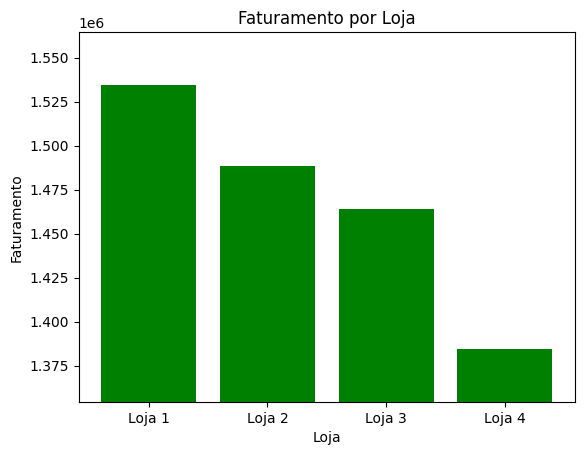

In [197]:
labels = list(faturamento.keys())
valores = list(faturamento.values())

minimo = min(valores)
maximo = max(valores)
margem = (maximo - minimo) * 0.2

plt.ylim(minimo-margem, maximo+margem)

plt.bar(labels,valores, color = "green")
plt.title("Faturamento por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento")


# 2. Vendas por Categoria

Text(0.5, 1.0, 'Vendas por Categoria de Produto')

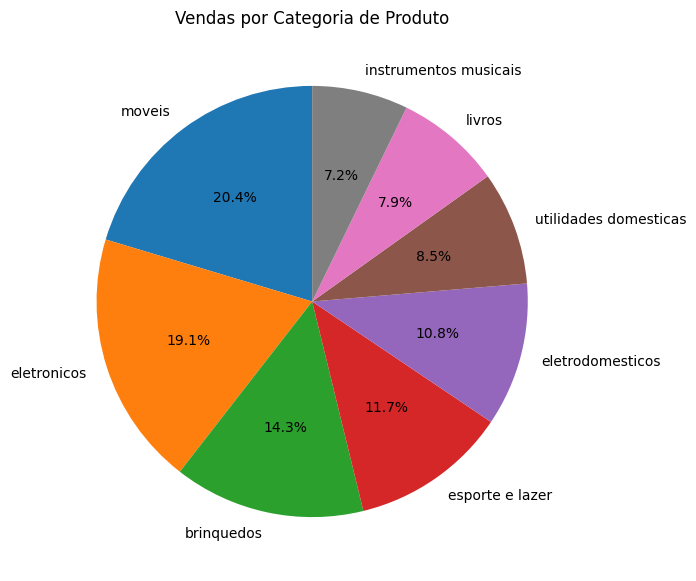

In [198]:


df_vendas_categoria = df['Categoria do Produto'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(7,7))

plt.pie(df_vendas_categoria.values, labels=df_vendas_categoria.index, autopct="%1.1f%%", startangle=90)
plt.title("Vendas por Categoria de Produto")

In [199]:
df_vendas_categoria

,count
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


# 3. Média de Avaliação das Lojas


In [200]:
medias_avaliacao_lojas = {}

for nome, df in lojas.items():
  medias_avaliacao_lojas[nome] = float(round(df['Avaliação da compra'].mean(),2))

In [201]:
medias_avaliacao_lojas

{'Loja 1': 3.98, 'Loja 2': 4.04, 'Loja 3': 4.05, 'Loja 4': 4.0}

Text(0, 0.5, 'Média de Avaliação')

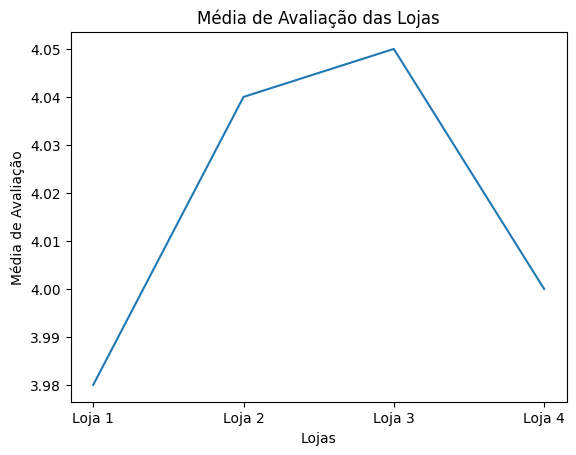

In [202]:
plt.plot(medias_avaliacao_lojas.keys(), medias_avaliacao_lojas.values())
plt.title("Média de Avaliação das Lojas")
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliação")

# 4. Produtos Mais e Menos Vendidos

In [203]:
mais_menos_vendidos = {}

for nome, df in lojas.items():
  contagem = df['Produto'].value_counts()
  produto_mais = contagem.idxmax()
  produto_menos = contagem.idxmin()

  mais_menos_vendidos[nome] = {
      "Produto mais vendido" : produto_mais,
      "Produto menos vendido" : produto_menos
  }

mais_menos_vendidos

{'Loja 1': {'Produto mais vendido': 'Micro-ondas',
  'Produto menos vendido': 'Headset'},
 'Loja 2': {'Produto mais vendido': 'Iniciando em programação',
  'Produto menos vendido': 'Jogo de tabuleiro'},
 'Loja 3': {'Produto mais vendido': 'Kit banquetas',
  'Produto menos vendido': 'Blocos de montar'},
 'Loja 4': {'Produto mais vendido': 'Cama box',
  'Produto menos vendido': 'Guitarra'}}

# 5. Frete Médio por Loja

In [204]:
media_frete_loja = {}

for nome, df in lojas.items():
  media_frete_loja[nome] = float(round(df['Frete'].mean(),2))

In [205]:
media_frete_loja

{'Loja 1': 34.69, 'Loja 2': 33.62, 'Loja 3': 33.07, 'Loja 4': 31.28}

Text(0, 0.5, 'Média de Frete')

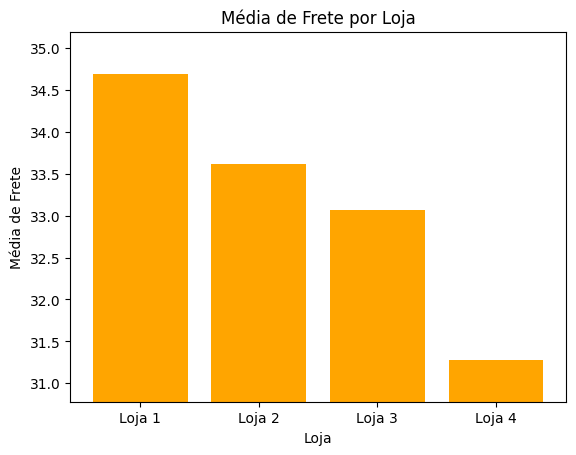

In [206]:
plt.ylim(min(media_frete_loja.values()) - 0.5, max(media_frete_loja.values()) + 0.5)
plt.bar(media_frete_loja.keys(), media_frete_loja.values(), color= "orange")
plt.title("Média de Frete por Loja")
plt.xlabel("Loja")
plt.ylabel("Média de Frete")

# Relatório

# Introdução
  O objetivo principal da análise realizada é fornecer dados que ajudem a decisão do Sr.João na escolha de venda de uma de suas quatro lojas da rede Alura Store Br. Dessa maneira identificando a loja de menor eficiência.

  Foram avaliados cinco fatores:
  1. Faturamento da Loja
  2. Categorias de Produtos Mais e Menos Vendidas
  3. Média de Avaliações dos Clientes por Loja
  4. Produto Mais e Menos Vendido por Loja
  5. O Frete Médio por Loja


#Faturamento
O Faturamento nos mostra a situação geral da loja:



* Loja 1: R$ 1534509.12

* Loja 2 : R$ 1488459.06

* Loja 3 : R$ 1464025.03

* Loja 4: R$ 1384497.58

  A Loja 4 evidência um faturamento menor que as outras, que possuem um desempenho próximo entre elas, mas melhor.


# Categorias de Produtos Mais e Menos Vendidas

A contagem total das categorias mostra quais produtos têm maior saída geral:

Móveis — 480 vendas

Eletrônicos — 451 vendas

Brinquedos — 338 vendas

Esporte e Lazer — 277 vendas

Eletrodomésticos — 254 vendas

Utilidades Domésticas — 201 vendas

Livros — 187 vendas

Instrumentos Musicais — 170 vendas


Produtos de maior volume de vendas se concentram nos setores de móveis e eletrônicos, enquanto categorias como livros e instrumentos musicais apresentam menor.
O que impacta mais as lojas com foco nessas categorias, especialmente quando combinadas ao baixo faturamento.

#Média das Avaliações por Loja

As avaliações dos clientes mostram o nível de satisfação com os produtos e serviços de cada loja:

Loja 1: ⭐ 3.98

Loja 2: ⭐ 4.04

Loja 3: ⭐ 4.05

Loja 4: ⭐ 4.00


AS quatro lojas têm avaliações próximas, porém a Loja 3 se destaca positivamente com (4.05). Enquanto a Loja 1 apresenta a pior média (3.98), contudo a diferença é minima e não é um fator determinante sozinho na nossa análise.


#Produtos Mais e Menos Vendidos por Loja

**Loja 1**

* Mais vendido: Micro-ondas

* Menos vendido: Headset

**Loja 2**

* Mais vendido: Iniciando em programação (livro)

* Menos vendido: Jogo de tabuleiro

**Loja 3**

* Mais vendido: Kit banquetas

* Menos vendido: Blocos de montar

**Loja 4**

* Mais vendido: Cama box

* Menos vendido: Guitarra

A Loja 4 apresenta um produto menos vendido que pertence a uma categoria  fraca com base no fator 2. Categorias de Produtos Mais e Menos Vendidas, ou seja Instrumentos Musicais, reforçando seu baixo faturamento.


# O Frete Médio por Loja

* Loja 1: R$ 34.69

* Loja 2: R$ 33.62

* Loja 3: R$ 33.07

* Loja 4: R$ 31.28

A Loja 4 apresenta o menor frete entre todas as lojas, mas mesmo com um frete competitivo ela não consegue compensar o baixo valor de faturamento.


# Conclusão

Após avaliar todos os fatores como faturamento, categoria de produtos, vendas, avaliações, frete. A loja que o Sr. João deve vender é a Loja 4.

Motivos de venda da Loja 4

É a loja com pior faturamento (R$ 1.384.497,58)

- Possui menor volume geral de vendas.

- Seus produtos menos vendidos pertencem a categorias já fracas.

- Mesmo com o menor frete, isso não melhora sua performance em vendas.

- Apresenta menor potencial de crescimento em comparação às demais

- As outras lojas têm resultados mais consistentes e sólidos

# Resumo Final

A Loja 4 é a opção menos vantajosa da sua rede atual na Alura Store BR.
Vender essa loja é a decisão estratégica mais lógica, pois permite que o Sr. João concentre seus recursos nas lojas que apresentam um maior faturamento, produtos com melhor giro, clientes mais satisfeitos e uma clara capacidade de expansão.


In [218]:
df_total.to_csv("Desafio_Alura_Store.csv", index=False , sep=";")

In [216]:
df_total['Loja'].unique()

array(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], dtype=object)

In [217]:
df_total

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 4
9431,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 4
9432,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 4
9433,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 4
